In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [9]:
books = pd.read_csv('BX-Books.csv',sep=';', on_bad_lines='skip', encoding="latin-1",low_memory=False)

In [13]:
books.head()

,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
1,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
2,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
3,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
4,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...


In [15]:
books.columns= ['ISBN','bookTitle','bookAuthor','yearOfPublication','publisher','imageUrls','imageUrlM','imageUrlL']


In [19]:
users = pd.read_csv('BX-Users.csv', sep=';',on_bad_lines='skip', encoding="latin-1")

In [21]:
users

,1,"nyc, new york, usa",\N
0,2,"stockton, california, usa",18
1,3,"moscow, yukon territory, russia",\N
2,4,"porto, v.n.gaia, portugal",17
3,5,"farnborough, hants, united kingdom",\N
4,6,"santa monica, california, usa",61
...,...,...,...
278852,278854,"portland, oregon, usa",\N
278853,278855,"tacoma, washington, united kingdom",50
278854,278856,"brampton, ontario, canada",\N
278855,278857,"knoxville, tennessee, usa",\N


In [27]:
users.columns = ['userID', 'Location', 'Age']

In [29]:
ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';',on_bad_lines='skip',  encoding="latin-1")

In [31]:
ratings

,276725,034545104X,0
0,276726,0155061224,5
1,276727,0446520802,0
2,276729,052165615X,3
3,276729,0521795028,6
4,276733,2080674722,0
...,...,...,...
1149774,276704,1563526298,9
1149775,276706,0679447156,0
1149776,276709,0515107662,10
1149777,276721,0590442449,10


In [37]:
ratings.columns = ['userID', 'ISBN', 'bookRating']


In [39]:
ratings.head()

,userID,ISBN,bookRating
0,276726,0155061224,5
1,276727,0446520802,0
2,276729,052165615X,3
3,276729,0521795028,6
4,276733,2080674722,0


In [35]:
print(ratings.shape)

(1149779, 3)


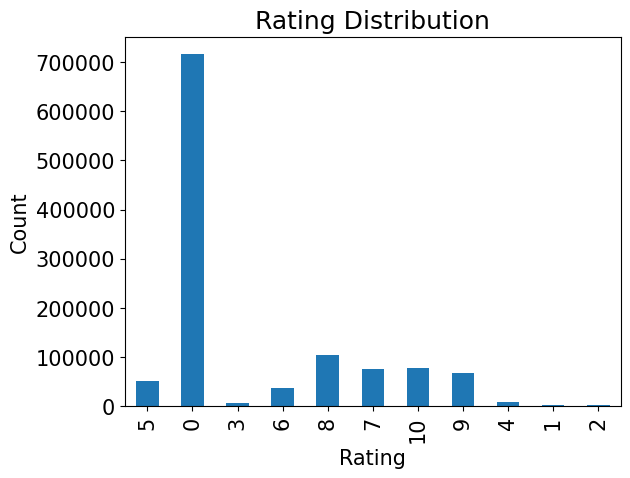

In [45]:
plt.rc("font",size=15)
ratings.bookRating.value_counts(sort=False).plot(kind='bar')
plt.title("Rating Distribution")

plt.xlabel('Rating')
plt.ylabel('Count')

plt.savefig('system11.png' ,bbox_inches='tight')

plt.show()

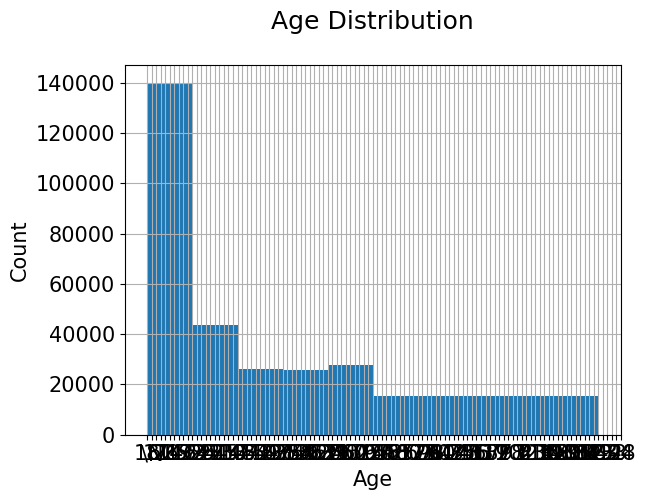

In [51]:
users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('system2.png', bbox_inches='tight')
plt.show()

In [57]:
count1 = ratings['userID'].value_counts()
# only users who have submitted at least 200 ratings
ratings = ratings[ratings['userID'].isin(count1[count1>=200].index)]

In [59]:
ratings

,userID,ISBN,bookRating
1455,277427,002542730X,10
1456,277427,0026217457,0
1457,277427,003008685X,8
1458,277427,0030615321,0
1459,277427,0060002050,0
...,...,...,...
1147611,275970,3829021860,0
1147612,275970,4770019572,0
1147613,275970,896086097,0
1147614,275970,9626340762,8


In [65]:
counts = ratings['bookRating'].value_counts()
ratings = ratings[ratings['bookRating'].isin(counts[counts >= 100].index)]

In [67]:
ratings

,userID,ISBN,bookRating
1455,277427,002542730X,10
1456,277427,0026217457,0
1457,277427,003008685X,8
1458,277427,0030615321,0
1459,277427,0060002050,0
...,...,...,...
1147611,275970,3829021860,0
1147612,275970,4770019572,0
1147613,275970,896086097,0
1147614,275970,9626340762,8


In [69]:
###collaborative filtering using knn

In [79]:
combine_book_rating = pd.merge(ratings,books, on='ISBN')
columns = ['yearOfPublication', 'publisher', 'bookAuthor', 'imageUrls', 'imageUrlM', 'imageUrlL']
combine_book_rating = combine_book_rating.drop(columns, axis=1)
combine_book_rating.head()

,userID,ISBN,bookRating,bookTitle
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
1,277427,0026217457,0,Vegetarian Times Complete Cookbook
2,277427,003008685X,8,Pioneers
3,277427,0030615321,0,"Ask for May, Settle for June (A Doonesbury book)"
4,277427,0060002050,0,On a Wicked Dawn (Cynster Novels)


In [83]:
combine_book_rating = combine_book_rating.dropna(axis = 0 ,subset = ["bookTitle"])


book_ratingCount = (combine_book_rating.
                    groupby(by = ['bookTitle'])['bookRating'].
                    count().
                    reset_index().
                    rename(columns = {'bookRating':'totalRatingCount'})
                    [['bookTitle','totalRatingCount']]
                   )

book_ratingCount.head()

                           
                    
                    

                                                                     

,bookTitle,totalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [91]:
rating_with_totalRatingCount = combine_book_rating.merge(book_ratingCount, left_on = 'bookTitle', right_on = 'bookTitle', how = 'left')
rating_with_totalRatingCount.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
1,277427,0026217457,0,Vegetarian Times Complete Cookbook,7
2,277427,003008685X,8,Pioneers,1
3,277427,0030615321,0,"Ask for May, Settle for June (A Doonesbury book)",1
4,277427,0060002050,0,On a Wicked Dawn (Cynster Novels),13


In [87]:
print(book_ratingCount['totalRatingCount'].describe())

count    160576.000000
mean          3.043680
std           7.428434
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         365.000000
Name: totalRatingCount, dtype: float64


In [93]:
##threshold values

popularity_threshold = 50
rating_popularity_book = rating_with_totalRatingCount.query('totalRatingCount > = @popularity_threshold')
rating_popularity_book.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
13,277427,0060930535,0,The Poisonwood Bible: A Novel,133
15,277427,0060934417,0,Bel Canto: A Novel,108
18,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Pape...,108
24,277427,006440188X,0,The Secret Garden,79


In [89]:
##filter to users in us and canada only

In [103]:
combined =  rating_popularity_book.merge(users ,left_on = 'userID' , right_on = 'userID',how = 'left')

us_canada_user_rating = combined[combined['Location'].str.contains("usa|canada")]
us_canada_user_rating = us_canada_user_rating.drop('Age' , axis=1)

us_canada_user_rating.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount,Location
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82,"gilbert, arizona, usa"
1,277427,0060930535,0,The Poisonwood Bible: A Novel,133,"gilbert, arizona, usa"
2,277427,0060934417,0,Bel Canto: A Novel,108,"gilbert, arizona, usa"
3,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Pape...,108,"gilbert, arizona, usa"
4,277427,006440188X,0,The Secret Garden,79,"gilbert, arizona, usa"


In [105]:
#implements knn

In [107]:
from scipy.sparse import csr_matrix
us_canada_user_rating = us_canada_user_rating.drop_duplicates(['userID', 'bookTitle'])
us_canada_user_rating_pivot = us_canada_user_rating.pivot(index = 'bookTitle', columns = 'userID', values = 'bookRating').fillna(0)
us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.values)

In [109]:
us_canada_user_rating_pivot

userID,254,2276,2766,2977,3363,4017,4385,6242,6251,6323,...,271448,271705,273979,274061,274308,274808,275970,277427,277639,278418
bookTitle,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,7.0,0.0,0.0,...,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
us_canada_user_rating_matrix


<746x734 sparse matrix of type '<class 'numpy.float64'>'
	with 13042 stored elements in Compressed Sparse Row format>

In [113]:
from sklearn.neighbors import NearestNeighbors


model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_canada_user_rating_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [138]:
query_index = np.random.choice(us_canada_user_rating_pivot.shape[0])

print(query_index)

distances, indices = model_knn.kneighbors(us_canada_user_rating_pivot.iloc[query_index,:].values.reshape(1,-1),n_neighbors=6)

40


In [140]:
us_canada_user_rating_pivot.index[query_index]

'All Around the Town'

In [142]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(us_canada_user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, us_canada_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for All Around the Town:

1: You Belong To Me, with distance of 0.6175773080108361:
2: Loves Music, Loves to Dance, with distance of 0.6465111748705674:
3: Moonlight Becomes You, with distance of 0.6847790876268638:
4: Before I Say Good-Bye, with distance of 0.6908029311411461:
5: Let Me Call You Sweetheart, with distance of 0.6971743934112093:
